In [6]:
import model as modelImport
import torch

# pick_device = 'cpu'
# DEVICE = torch.device(pick_device)
# model = modelImport.MyModel2().to(DEVICE)


In [8]:
# for x in model.parameters():
#     print(x)

Parameter containing:
tensor([[[[-0.2478,  0.2808,  0.0250],
          [ 0.2699,  0.2489, -0.3281],
          [ 0.2090,  0.0511, -0.0031]]],


        [[[-0.1557, -0.1154, -0.1337],
          [-0.3157, -0.2251, -0.1963],
          [ 0.3313,  0.0294,  0.1302]]],


        [[[-0.3309, -0.2853, -0.0039],
          [-0.2903, -0.1076, -0.1406],
          [-0.1644,  0.1732,  0.0014]]],


        [[[-0.3000,  0.2743,  0.1923],
          [ 0.2722, -0.3275, -0.1100],
          [-0.1309,  0.1634,  0.1880]]]], requires_grad=True)
Parameter containing:
tensor([-0.3185, -0.1076,  0.0320, -0.1569], requires_grad=True)
Parameter containing:
tensor([[ 0.0118,  0.0113,  0.0115,  ..., -0.0150, -0.0056,  0.0023],
        [ 0.0060, -0.0170, -0.0043,  ..., -0.0073,  0.0130,  0.0030],
        [ 0.0139,  0.0077, -0.0085,  ..., -0.0028,  0.0084, -0.0103],
        ...,
        [-0.0152,  0.0016,  0.0020,  ..., -0.0086,  0.0018,  0.0048],
        [-0.0171, -0.0050, -0.0137,  ..., -0.0141, -0.0001,  0.0113],
   

In [9]:
# for x in model.modules() :
#     print(x)

MyModel2(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (fc1): Linear(in_features=3136, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)
Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU()
Linear(in_features=3136, out_features=100, bias=True)
Linear(in_features=100, out_features=10, bias=True)


In [14]:
# print(model.modules())
# model_collection = [ x in model.modules()]
# print(model_collection)
entries = [entry for entry in model.modules()]  ##need to ignore other files!?!?<<<<<<<<
print(entries)

[MyModel2(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (fc1): Linear(in_features=3136, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
), Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(), Linear(in_features=3136, out_features=100, bias=True), Linear(in_features=100, out_features=10, bias=True)]


In [149]:
import torch
from VAE import VAE

PATH_VAE = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_training'

model_vae = VAE()
model_vae.load_state_dict(torch.load(PATH_VAE))
model_vae.eval()


VAE(
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (img_to_hidden): Linear(in_features=784, out_features=100, bias=True)
  (hidden_to_latent): Linear(in_features=100, out_features=20, bias=True)
  (latent_to_image): Linear(in_features=20, out_features=784, bias=True)
)

In [148]:
from torchvision.transforms import transforms
from torchvision import datasets
import torch.utils.data
import matplotlib.pyplot as plt


def get_test_images_random(count_of_images):
    testset = datasets.MNIST(root='data/testset', transform=transforms.ToTensor(), download=True)
    testsetloader = torch.utils.data.DataLoader(testset, batch_size=count_of_images, shuffle=True)  #TODO shuffle for
    return next(iter(testsetloader))


num_of_tests = 10


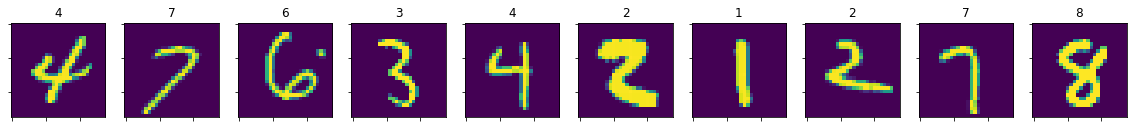

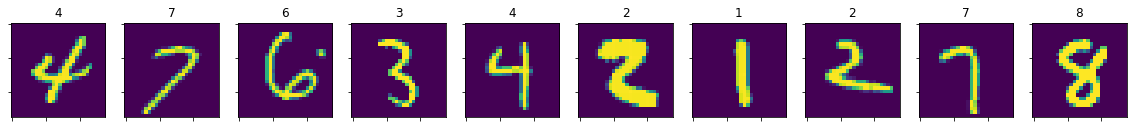

In [266]:
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

# First create some toy data:
# x = np.linspace(0, 2 * np.pi, 400)
# y = np.sin(x ** 2)
#
# f, axs = plt.subplots(1, 4, sharey='all')
# axs[0].plot(x, y)
# axs[0].set_title('Sharing Y axis')
# axs[1].scatter(x, y)
# testing_images = get_test_images_random(3)


def show_images_from_testing(count_of_images):
    testset = datasets.MNIST(root='data/testset', transform=transforms.ToTensor(), download=True)
    testsetloader = torch.utils.data.DataLoader(testset, batch_size=count_of_images, shuffle=True)  #TODO shuffle for
    testing_images, labels =  next(iter(testsetloader))
    if count_of_images == 1 : num_of_tests = 2
    num_of_tests = testing_images.__len__()
    # fig, axs = plt.subplots(1, num_of_tests,sharey='all')
    size_fig = 15
    num_plots = count_of_images
    if count_of_images == 1 : num_plots = 2
    if count_of_images <= 8 : size_fig = 150 / count_of_images
    if count_of_images <= 3 : size_fig = 5
    if count_of_images > 8 : size_fig = 200 / count_of_images
    if count_of_images > 15 : size_fig = 300 / count_of_images
    fig, axs = plt.subplots(1, num_plots,figsize=(size_fig,size_fig))
    fig2, axs2 = plt.subplots(1, num_plots,figsize=(size_fig,size_fig))
    print(f'{num_of_tests = }')

    for indx in range(num_of_tests):
        axs[indx].set_yticklabels([]) # x-axis
        axs[indx].set_xticklabels([]) # y-axis
        axs[indx].imshow(testing_images[indx,0,:,:])
        axs[indx].set_title(int(labels[indx]))

    for indx in range(num_of_tests):
        axs2[indx].set_yticklabels([]) # x-axis
        axs2[indx].set_xticklabels([]) # y-axis
        axs2[indx].imshow(testing_images[indx,0,:,:])
        axs2[indx].set_title(int(labels[indx]))

show_images_from_testing(10)


^C
TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.11.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C
